<a href="https://colab.research.google.com/github/sandhyagad/AlternusVera/blob/master/OpinionMining_Insurgents_Sprint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Configuration of the System: 




 **Notebook Location** The solution/collab notebook of my factor OPINION MINING can be found under : 

 Github Link:
 
 Colab Link : https://colab.research.google.com/drive/1mOM0GidMd5erLuQpLI_JsO_qsO0e381C

**Code structure:** I have placed the solution and displayed relevant tables and charts/graphs after every algorithm /methodology implementation.


**Dataset can be found under the folder :** 
https://drive.google.com/open?id=1LmgezyFPNxzsPwBadQyOnjoHsR-dxq8C



Dataset Source :

https://www.cs.ucsb.edu/~william/data/liar_dataset.zip

Dataset Location:

https://drive.google.com/open?id=1S70qVBSaerLJqu5rjA1RP_3gTLSJ-kj5




2. Data Collection : initial Data Set
3. 3.	Set Data Narrative : Set Business Objectives, what use case are you solving for


**Opinion Mining on customer review Dataset:**

Below is the cumulative implementation of Opinion mining factor. I have implemeneted Opinion mining on Liar Liar Data set separately to study the dataset that helps to decide how to amalgamate the dataset with Amazon reviews datasetr.

I have also finetuning of parameters to increase the efficiency of the algorithms as an enhancement to amazon reviews dataset.


**Importing the required Libraries**

In [0]:
# importing packages
import pandas as pd 
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
%matplotlib inline 
import warnings  

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')
##################
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
#from sklearn.cross_validation import data_test_split
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import cross_val_score
import nltk
import re
import codecs
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

**Mounting the drive on the google**

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Reading the data from the file**

In [0]:
df=pd.read_csv('../content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/1429_1.csv')
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id                      34660 non-null object
name                    27900 non-null object
asins                   34658 non-null object
brand                   34660 non-null object
categories              34660 non-null object
keys                    34660 non-null object
manufacturer            34660 non-null object
reviews.date            34621 non-null object
reviews.dateAdded       24039 non-null object
reviews.dateSeen        34660 non-null object
reviews.didPurchase     1 non-null object
reviews.doRecommend     34066 non-null object
reviews.id              1 non-null float64
reviews.numHelpful      34131 non-null float64
reviews.rating          34627 non-null float64
reviews.sourceURLs      34660 non-null object
reviews.text            34659 non-null object
reviews.title           34655 non-null object
reviews.userCity        0 non-null float64
reviews.userProvince    0

In [0]:
data = df[["id","reviews.text","reviews.rating"]]

In [0]:
data.head() 

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0


In [0]:
data.describe(include=["O"])

,id,reviews.text
count,34660,34659
unique,42,34659
top,AVphgVaX1cnluZ0-DR74,My kids really like this tablet. It's easy to ...
freq,10966,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 3 columns):
id                34660 non-null object
reviews.text      34659 non-null object
reviews.rating    34627 non-null float64
dtypes: float64(1), object(2)
memory usage: 812.5+ KB


We notoiced review.text is missing, hence no analysis can be done on this sample. So we remove it. Furthermore, there are 32 missing values for the ratings. Due to the low number of missing values in the rating column it is possible to substitute the NaN with the mean of the others or we could simply remove those samples. Since we would have many samples anyway they can be simply removed.

In [0]:
data = data.dropna()

**Exploratory Data Analysis**

In this step, the most common words used in the text reviews using a word cloud is verified. Found that there were words that have no importance with the sentiment of the comment, such as: use, device, time etc


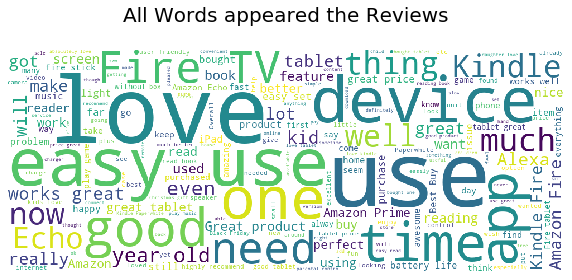

In [0]:
rt = data['reviews.text']
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate(" ".join(rt))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('All Words appeared the Reviews\n',size=20)
plt.axis('off')
plt.show()


In this step, word count of certain words that could describe the sentiment in a better way is calculated. Most of the comments looked positive. 



In [0]:
words = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

rt = " ".join(data['reviews.text'])

In [0]:
diz = {}
for word in rt.split(" "):
    if word in words:
        diz[word] = diz.get(word,0)+1

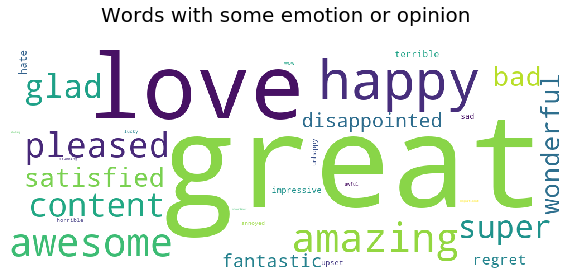

In [0]:
wordcloud = WordCloud(background_color='white',
                      width=1000,
                      height=400
                     ).generate_from_frequencies(diz)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.title('Words with some emotion or opinion\n',size=20)
plt.axis('off')
plt.show()

Proceeding further, the average rating for every product is calculated. For this purpose, the ID of the data frame is used to represent the different products.

We noticed that the reviews are heavily biased towards positive reviews. 4 and 5 ratings are extremely high, and the averages are all above 3. To try and balance things out and tried to oversample the lower rating reviews. Hence uploaded the other two csv files and get only the reviews that have ratings lower or equal to 3. 


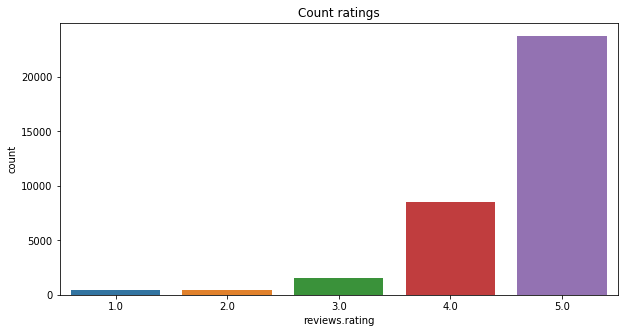

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(data['reviews.rating'])
plt.title('Count ratings')
plt.show()

In [0]:
data1 = data.groupby("id").mean().reset_index()

In [0]:
data1 = data1.sort_values(['reviews.rating']).reset_index()

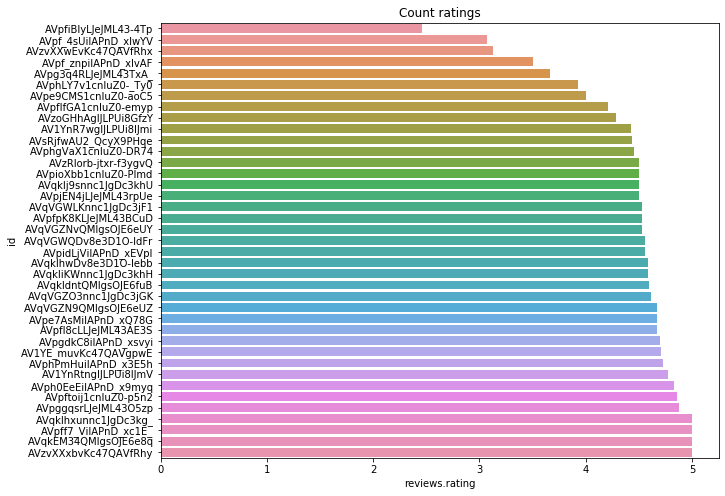

In [0]:
plt.figure(figsize=(10,8))
sns.barplot(x=data1["reviews.rating"], y=data1["id"])
plt.title('Count ratings')
plt.show()

We can clearly see how the reviews are heavily biased towards positive reviews. 4 and 5 ratings are extremely high and the averages are all above 3. To try and balance things out I will upload the other two csv files and get only the reviews that have ratings lower or equal to 3. So we are trying to oversample the lower rating reviews.

In [0]:
df2 = pd.read_csv("/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv")
df3 = pd.read_csv("/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv")


In [0]:
data2 = df2[["id","reviews.text","reviews.rating"]]
data3 = df3[["id","reviews.text","reviews.rating"]]

In [0]:
data2 = data2[data2["reviews.rating"]<=3]
data3 = data3[data3["reviews.rating"]<=3]

In [0]:
len(data2), len(data3)

(2787, 314)

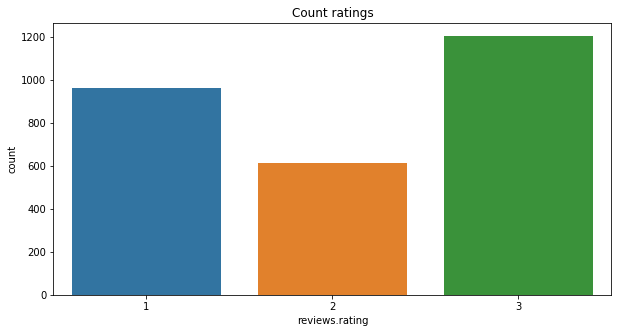

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(data2['reviews.rating'])
plt.title('Count ratings')
plt.show()

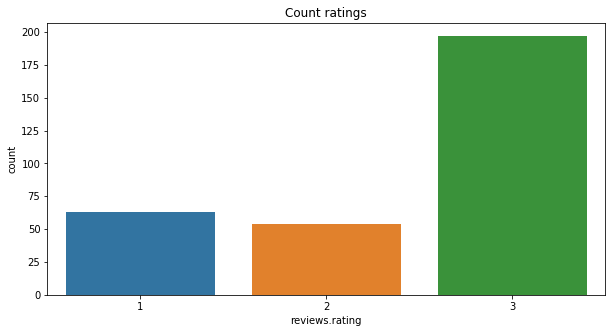

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(data3['reviews.rating'])
plt.title('Count ratings')
plt.show()

Now that all three datasets are available ,concatenate them together.

In [0]:
frames = [data, data2, data3]
final = pd.concat(frames)

Verifying if the data is a little bit less biased


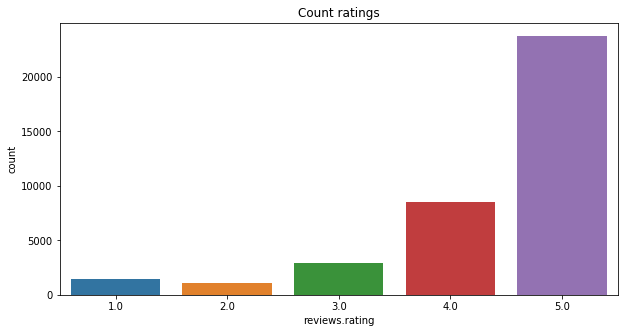

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(final['reviews.rating'])
plt.title('Count ratings')
plt.show()



The situation hasn't improved a lot but hopefully it will make a difference when training the model later on. A further approach could be to undersample the positive reviews.


In [0]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,This product so far has not disappointed. My c...,5.0
1,AVqkIhwDv8e3D1O-lebb,great for beginner or experienced person. Boug...,5.0
2,AVqkIhwDv8e3D1O-lebb,Inexpensive tablet for him to use and learn on...,5.0
3,AVqkIhwDv8e3D1O-lebb,I've had my Fire HD 8 two weeks now and I love...,4.0
4,AVqkIhwDv8e3D1O-lebb,I bought this for my grand daughter when she c...,5.0



**Preprocessing Text**

This step includes

Removing special characters and punctuations

Lower casing the all the text

Tokenization

Removing Stop words

Lemmatization

Stemming


In [0]:
import nltk
nltk.download('all')

In [0]:
#lower case all text
final["reviews.text"]=final["reviews.text"].str.lower() 

#tokenization of words
final['reviews.text'] = final.apply(lambda row: word_tokenize(row['reviews.text']), axis=1) 

#only alphanumerical values
final["reviews.text"] = final['reviews.text'].apply(lambda x: [item for item in x if item.isalpha()]) 

#lemmatazing words
final['reviews.text'] = final['reviews.text'].apply(lambda x : [WordNetLemmatizer().lemmatize(y) for y in x])

#removing useless words
stop = stopwords.words('english')
final['reviews.text'] = final['reviews.text'].apply(lambda x: [item for item in x if item not in stop])

In [0]:
#joining all tokens
final["reviews.text"] = final["reviews.text"].apply(lambda x: str(' '.join(x))) 

In [0]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters.
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in words]
    
    # 7. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
final['reviews.text'] = final['reviews.text'].apply(cleaning)

In [0]:
final.head()

,id,reviews.text,reviews.rating
0,AVqkIhwDv8e3D1O-lebb,product far disappoint children love use like ...,5.0
1,AVqkIhwDv8e3D1O-lebb,great beginn experienc person bought gift love,5.0
2,AVqkIhwDv8e3D1O-lebb,inexpens tablet use learn step nabi thrill lea...,5.0
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great valu prime ...,4.0
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0



Dataset had the ratings of the products so we assigned a sentiment to all of the ratings, we considered 
a positive sentiment (1)  when the ratings are 4 and 5. 
a negative sentiment (0) when the rating is 1,2 and 3.
We considered neutral sentiment in subsequent stages.


In [0]:
#sentiment = {1: 0,
#             2: 0,
#             3: 0,
#             4: 1,
#             5: 1}
#final["sentiment"] = final["reviews.rating"].map(sentiment)

def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
final["sentiment"] = final["reviews.rating"].apply(sentiments)



In [0]:
final.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far disappoint children love use like ...,5.0,1
1,AVqkIhwDv8e3D1O-lebb,great beginn experienc person bought gift love,5.0,1
2,AVqkIhwDv8e3D1O-lebb,inexpens tablet use learn step nabi thrill lea...,5.0,1
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great valu prime ...,4.0,1
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,1


In [0]:
len(final[final["sentiment"]==0]),len(final[final["sentiment"]==1])

(5412, 32315)

We can see how the data is heavily biased to positive sentiments. One way to fix this would be to undersample the positive sentiments. Beofre doing this I would like to verify how the model will perform with these values.

**Logistic Regression:**

We observed that the data was heavily biased to positive emotions. To fix this, we under sampled the positive sentiments. 
By using the precision, recall and f1-score on every label we verified how well the model has learnt to classify each label. 

In [0]:
# building tfidf matrix to train models 
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer =TfidfVectorizer(max_df=0.9)
text = vectorizer.fit_transform(final["reviews.text"])

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)


In [0]:
x_test[0]

<1x12218 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [0]:
# try logistic regression first
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=1)
lr_classifier.fit(x_train, y_train)
y_pred = lr_classifier.predict(x_test)
y_pred_tr = lr_classifier.predict(x_train)

In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9112995847689725
Train accuracy 0.9300590730081794




Test and train accuracies are high, however, we must consider that the data is heavily biased towards positive reviews.


In [0]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.92      0.56      0.70      3769
           1       0.93      0.99      0.96     22639

    accuracy                           0.93     26408
   macro avg       0.92      0.78      0.83     26408
weighted avg       0.93      0.93      0.92     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.83      0.49      0.61      1643
           1       0.92      0.98      0.95      9676

    accuracy                           0.91     11319
   macro avg       0.88      0.73      0.78     11319
weighted avg       0.91      0.91      0.90     11319




By using the precision, recall and f1-score on every label we can verify how well the model has learnt to classify each label. The test and train scores are not that good for the negative reviews. We will try then to use another model, Random Forests.

**Random Forest**

In [0]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9287922961392349
Train accuracy 0.9962511360193881


In [0]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      0.99      0.99     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.83      0.64      0.72      1643
           1       0.94      0.98      0.96      9676

    accuracy                           0.93     11319
   macro avg       0.89      0.81      0.84     11319
weighted avg       0.93      0.93      0.92     11319





After this step, there was improvement in the precision, recall and f1 score for both positive and negative classes. Even though the negative sentiment in the test data set has a score of 0.71 for the f1 score, which is still an improvement from before.

We tried to improve this by using a 5-fold cross validation for parameter tuning.


**Fine tuning trying in springt 3**

I tried to increase the scores by using the grid search by fine tune the parameters.

Fine tuning using Grid Search of the best parameters on a grid of possible values.I  the grid search with Random Forest and SVC classifier.Finally we will test the accuracy of our final classifier (after fine-tuning)




In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [10,50,100,200],
             "criterion":("gini","entropy")}
classifier = RandomForestClassifier()
clf = GridSearchCV(classifier, parameters, cv=2)
clf.fit(x_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
#Viewing best parameters in Grid Search
best_parameter = clf.best_params_
best_accuracy = clf.best_score_ #best cros validated mean
print('Best parameter: ' + str(best_parameter))
print('Best accuracy: ' + str(best_accuracy))

Best parameter: {'criterion': 'entropy', 'n_estimators': 100}
Best accuracy: 0.9263102090275674


In [0]:
classifier = RandomForestClassifier(criterion = best_parameter["criterion"], 
                                    n_estimators = best_parameter["n_estimators"])
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))



Test accuracy 0.9357717112819154
Train accuracy 0.9994698576189034


In [0]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      1.00      1.00     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1643
           1       0.94      0.99      0.96      9676

    accuracy                           0.94     11319
   macro avg       0.93      0.80      0.85     11319
weighted avg       0.93      0.94      0.93     11319





The overall performance has improved. We can see that the precision of the 0 label as increased, and so did the f1 score

We can say that the overall performance is satisfactory and we can proceed by trying to add a third label, the neutral sentiment value.


**SVM**

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)

# SVM
from sklearn.svm import SVC

svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
y_pred_svm = svm_classifier.predict(x_test)
y_pred_tr_svm = svm_classifier.predict(x_train)

In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9357717112819154
Train accuracy 0.9994698576189034


In [0]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      1.00      1.00     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1643
           1       0.94      0.99      0.96      9676

    accuracy                           0.94     11319
   macro avg       0.93      0.80      0.85     11319
weighted avg       0.93      0.94      0.93     11319



Support Vector Machines is very suitable for classification by measuring extreme values between classes, to differentiate the worst case scenarios so that it can classify between Positive, Neutral and Negative correctly.

**Labels**

We classifed the opinions into three categories: Positive, Negative and Neutral.



In [0]:
sentiment = {1: 0,
            2: 0,
            3: 1,
            4: 2,
            5: 2}

final["sentiment"] = final["reviews.rating"].map(sentiment)

In [0]:
final.head()

,id,reviews.text,reviews.rating,sentiment
0,AVqkIhwDv8e3D1O-lebb,product far ha disappointed child love use lik...,5.0,2
1,AVqkIhwDv8e3D1O-lebb,great beginner experienced person bought gift ...,5.0,2
2,AVqkIhwDv8e3D1O-lebb,inexpensive tablet use learn step nabi wa thri...,5.0,2
3,AVqkIhwDv8e3D1O-lebb,fire hd two week love tablet great prime membe...,4.0,2
4,AVqkIhwDv8e3D1O-lebb,bought grand daughter come visit set user ente...,5.0,2


In [0]:
len(final[final["sentiment"]==0]),len(final[final["sentiment"]==1]),len(final[final["sentiment"]==2])

(2510, 2902, 32315)



we can observe from above that it is heavily biased towards the positive sentiment.


**TFIDF MATRIX**

TF-IDF is an algorithm it has 2 subparts:
Terms frequency
Inverse data frequency.
TF gives us the frequency of the word in each document while IDF give us the weight of all rare words present in the document. In LDA we divide the document on the basic of topics and classify words as per topic. Here we are checking the frequency of each word and comparing it with normal LDA model.

In [0]:
# building tfidf matrix to train models 
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer =TfidfVectorizer(max_df=0.9)
#text = vectorizer.fit_transform(final["reviews.text"])

from sklearn.feature_extraction.text import TfidfVectorizer
def vectorizer(X_train):
    vectorizer = TfidfVectorizer(max_df= 0.9).fit(X_train)
    return vectorizer
    text = vectorizer(final["reviews.text"])


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(text, final["sentiment"], test_size=0.3, random_state=1)

In [0]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=1)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9126247901758106
Train accuracy 0.926991820660406


In [0]:
from sklearn.metrics import classification_report
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.90      0.55      0.68      3769
           1       0.93      0.99      0.96     22639

    accuracy                           0.93     26408
   macro avg       0.91      0.77      0.82     26408
weighted avg       0.93      0.93      0.92     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.83      0.50      0.62      1643
           1       0.92      0.98      0.95      9676

    accuracy                           0.91     11319
   macro avg       0.88      0.74      0.79     11319
weighted avg       0.91      0.91      0.90     11319





Very low F1 score for the test data set for the undersampled data sets. Hence trying below with the Randm Forest algorithm again.


In [0]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred_tr = classifier.predict(x_train)

In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9311776658715434
Train accuracy 0.9957209936382915


In [0]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      0.99      0.99     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      1643
           1       0.94      0.98      0.96      9676

    accuracy                           0.93     11319
   macro avg       0.90      0.80      0.84     11319
weighted avg       0.93      0.93      0.93     11319



There is a slight improvement with the random forest compared to the logistic model. 

**SVM**

In [0]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train) 
predsvm=svm_clf.predict(x_test)

In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.9311776658715434
Train accuracy 0.9957209936382915


In [0]:
print("Classification Report(Train)")
print(classification_report(y_train, y_pred_tr))
print("Classification Report(Test)")
print(classification_report(y_test, y_pred))

Classification Report(Train)
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3769
           1       1.00      1.00      1.00     22639

    accuracy                           1.00     26408
   macro avg       1.00      0.99      0.99     26408
weighted avg       1.00      1.00      1.00     26408

Classification Report(Test)
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      1643
           1       0.94      0.98      0.96      9676

    accuracy                           0.93     11319
   macro avg       0.90      0.80      0.84     11319
weighted avg       0.93      0.93      0.93     11319



**Naive Bias**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
gnb = MultinomialNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)
print(classification_report(y_test,y_pred))
cnfmtx=confusion_matrix(y_test,y_pred)
print("Confusion matrix:\n",cnfmtx)

print("Mean squared error: %.2f" %mean_squared_error(y_test, y_pred))
print("Mean absolute error: %.2f" %mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: %.2f ' %np.sqrt(mean_squared_error(y_test, y_pred)))
print('Accuracy :', accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.25      0.40      1643
           1       0.89      1.00      0.94      9676

    accuracy                           0.89     11319
   macro avg       0.92      0.62      0.67     11319
weighted avg       0.90      0.89      0.86     11319

Confusion matrix:
 [[ 414 1229]
 [  20 9656]]
Mean squared error: 0.11
Mean absolute error: 0.11
Root Mean Squared Error: 0.33 
Accuracy : 0.8896545631239509


In [0]:
print('Test accuracy', sum(y_test == y_pred)/len(y_test))
print('Train accuracy', sum(y_train == y_pred_tr)/len(y_train))

Test accuracy 0.8896545631239509
Train accuracy 0.9957209936382915




**Conclusions**

From the models evaluated we can say that the three label sentiment analysis provieds good enough results. However, it can be improved by balancing the dataset. Either increasing the number of negative and neutral labels or by decreasing the positive labels. The f1, precision and recall overall score of the latest Random Forest model has good results.



**RNN**

Recurrent Neural Network(RNN) are a type of Neural Network where the output from previous step are fed as input to the current step.Sentiment analysis can obtain wonderful results using RNN(tensor flow). Please find the code below with the training process.
Data preprocessing

RNN input requires array data type, therefore, we convert the “Reviews” into the X array and “Sentiment” into the y array accordingly.[latest]

### Delta and Latest Work AV - Sprint 3 Summary

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Dropout, LSTM
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [0]:
t = Tokenizer()

In [0]:
#the max length is aroun 1000 character. I would keep it shorter. 
max_length = max([len(s.split()) for s in final["reviews.text"] ])
max_legth=max_length 


In [0]:
vocab_size = len(t.word_index)+1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(final["reviews.text"], final["sentiment"], test_size=0.25)

In [0]:
#X_train = t.texts_to_sequences(X_train)
#X_test = t.texts_to_sequences(X_test)

In [0]:
#X_train = pad_sequences(X_train, maxlen=max_length, padding = "post",truncating = "post")
#X_test = pad_sequences(X_test, maxlen=max_length, padding = "post", truncating = "post")

In [0]:
#X_train = X_train[0:28290]
#y_train = y_train[0:28290]
#X_test = X_test[0:9430]
#y_test = y_test[0:9430]
#len(y_test),len(X_test),len(X_train),len(y_train)



(9430, 9430, 28290, 28290)

In [0]:
#from keras.utils import np_utils #converting to categorical
##y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

Reading and displaying LL

# Amalgamation /Data Enrichment 1
I amalgamated sentiment column with the Liar Liar after performing all the required preprocessing and Extracted Features on the Amazon reviews dataset 

In [0]:
cols = ["ID", "label", "statement", "subject", "speaker", "job", "state", "party", "barely_true_cts",
        "false_cts", "half_true_cts", "mostly_true_cts", "pants_on_fire_cts", "context"]
train_opinion = pd.read_csv("/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Liar-Liar-Dataset/train.tsv", sep='\t' , header=None)
train_opinion.columns=cols
train_opinion.head(10)



,ID,label,statement,subject,speaker,job,state,party,barely_true_cts,false_cts,half_true_cts,mostly_true_cts,pants_on_fire_cts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece
6,2342.json,barely-true,Jim Dunnam has not lived in the district he re...,candidates-biography,republican-party-texas,NaN,Texas,republican,3.0,1.0,1.0,3.0,1.0,a press release.
7,153.json,half-true,I'm the only person on this stage who has work...,ethics,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,"a Democratic debate in Philadelphia, Pa."
8,5602.json,half-true,"However, it took $19.5 million in Oregon Lotte...",jobs,oregon-lottery,NaN,NaN,organization,0.0,0.0,1.0,0.0,1.0,a website
9,9741.json,mostly-true,Says GOP primary opponents Glenn Grothman and ...,"energy,message-machine-2014,voting-record",duey-stroebel,State representative,Wisconsin,republican,0.0,0.0,0.0,1.0,0.0,an online video


In [0]:
import nltk
nltk.download('all')

In [0]:
def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize( news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(stems)

In [0]:
train_opinion['clean'] = train_opinion["statement"].apply(cleaning)

In [0]:
senti=train_opinion['clean']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorizer(X_train):
    vectorizer = TfidfVectorizer(max_df= 0.9).fit(X_train)
    return vectorizer

In [0]:
v = vectorizer(train_opinion)
test_liar = v.fit_transform(train_opinion['clean'].values)


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(test_liar)

In [0]:
test_liar

<10240x7607 sparse matrix of type '<class 'numpy.float64'>'
	with 103299 stored elements in Compressed Sparse Row format>

Liar Liar Dataset Opinion Mining:
https://colab.research.google.com/drive/1r_zeFMHh-7qeEWkPNSmMn3_2BuD22XNN

In [0]:
#pred = lr_classifier.predict_proba(np.array[[test_liar.data]])


In [0]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')
import nltk
nltk.download('vader_lexicon')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [0]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [0]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    #print(sentimentVector)
    return sentimentVector

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/train_sentiment.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/test_sentiment.csv', sep=',', header=None, names = columnNames)

        dataTrain = dataTrain.iloc[1:] 
        dataTest = dataTest.iloc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')

        
        self.ranFor_pipeline = Pipeline([
                ('LogRCV', tfidfV),
                ('LogR_clf',RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0))
                ])
        

        self.ranFor_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
        predicted_LogR = self.ranFor_pipeline.predict(dataTest['headline_text'])
        score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_LogR)
        print("Sentiment Analysis  - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.ranFor_pipeline.predict([text])
        predicedProb = self.ranFor_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis  - accuracy:   0.960784


(True, 0.9811315920552556)

In [0]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import *
from sklearn import metrics
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

class SentimentAnalysis():

    def __init__(self):        

        columnNames = ["jsonid", "label", "headline_text", "subject", "speaker", "speaker_job_title", "state_info", "party_affiliation", "barely_true_counts", "false_counts", "half_true_counts", "mostly_true_counts", "pants_on_fire_counts", "context","clean", "sentiment_vector","vader_polarity", "sentiment_score"]
        dataTrain = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/train_sentiment.csv', sep=',', header=None, names = columnNames)
        dataTest = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/test_sentiment.csv', sep=',', header=None, names = columnNames)

        dataTrain = dataTrain.iloc[1:] 
        dataTest = dataTest.iloc[1:]
    
    
        tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        
        #self.svm_pipeline = Pipeline([
           #     ('SVM_Clf', tfidfV),
             #   ('SVM_Clf',svm_clf(n_estimators=100, max_depth=8, random_state=0))
             #   ])
        
        from sklearn.svm import LinearSVC
        self.clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                                      ("tfidf", TfidfTransformer()),
                                      ("clf_linearSVC", LinearSVC())])
        clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

        predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
        np.mean(predictedLinearSVC == X_test_targetSentiment)
        score = metrics.accuracy_score(dataTest['vader_polarity'], predictedLinearSVC)

       # self.svm_pipeline.fit(dataTrain['headline_text'],dataTrain['vader_polarity'])
       # predicted_svm = self.svm_pipeline.predict(dataTest['headline_text'])
        #score = metrics.accuracy_score(dataTest['vader_polarity'], predicted_svm)
        print("Sentiment Analysis  - accuracy:   %0.6f" % score)
        

    def predict(self, text):
        predicted = self.svm_pipeline.predict([text])
        predicedProb = self.svm_pipeline.predict_proba([text])[:,1]
        return bool(predicted), float(predicedProb)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")





NameError: ignored

In [0]:
trainSenti = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/train_sentiment.csv')
testSenti = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/test_sentiment.csv')

print(trainSenti.shape)
trainSenti.head()

(260, 19)


,Unnamed: 0,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,5,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,chicago bear start quarterback last year total...,"[0.335, 0.6, 0.065, -0.7506]",0,-0.7506
1,51,13210.json,barely-true,"Maggie Hassan raised tuition, making it the hi...",education,national-republican-senatorial-committee,0,0,republican,11.0,5.0,7.0,2.0,5.0,an ad,magi hassan rais tuition make highest america,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,97,7599.json,mostly-true,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,4.0,3.0,0.0,a Board of Governors meeting,averag student florida actual pay pocket major...,"[0.104, 0.896, 0.0, -0.1027]",0,-0.1027
3,123,9500.json,mostly-true,Gov. Rick Scott cut the cost of prepaid colleg...,education,republican-party-florida,0,0,republican,10.0,6.0,6.0,6.0,4.0,a TV ad,gov rick scott cut cost prepaid college tuitio...,"[0.208, 0.792, 0.0, -0.2732]",0,-0.2732
4,280,12497.json,true,"Since 1978, college tuition nationwide has gon...",education,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a radio interview,sinc college tuition nationwide gone cometh li...,"[0.0, 0.8, 0.2, 0.3612]",0,0.3612


In [0]:
def convert_to_label(label):
    if(label == 'true'):
        return 5
    if(label == 'mostly-true'):
        return 4
    if(label == 'half-true'):
        return 3
    if(label == 'barely-true'):
        return 2
    if(label == 'false'):
        return 1
    if(label == 'pants-fire'):
        return 0

In [0]:
trainSenti['label'] = trainSenti['label'].apply(convert_to_label)
trainSenti.rename(columns = {'label':'amal_label'}, inplace = True)
trainSenti.head(10)

,Unnamed: 0,jsonid,amal_label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score
0,5,12465.json,5,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece,chicago bear start quarterback last year total...,"[0.335, 0.6, 0.065, -0.7506]",0,-0.7506
1,51,13210.json,2,"Maggie Hassan raised tuition, making it the hi...",education,national-republican-senatorial-committee,0,0,republican,11.0,5.0,7.0,2.0,5.0,an ad,magi hassan rais tuition make highest america,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,97,7599.json,4,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,4.0,3.0,0.0,a Board of Governors meeting,averag student florida actual pay pocket major...,"[0.104, 0.896, 0.0, -0.1027]",0,-0.1027
3,123,9500.json,4,Gov. Rick Scott cut the cost of prepaid colleg...,education,republican-party-florida,0,0,republican,10.0,6.0,6.0,6.0,4.0,a TV ad,gov rick scott cut cost prepaid college tuitio...,"[0.208, 0.792, 0.0, -0.2732]",0,-0.2732
4,280,12497.json,5,"Since 1978, college tuition nationwide has gon...",education,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a radio interview,sinc college tuition nationwide gone cometh li...,"[0.0, 0.8, 0.2, 0.3612]",0,0.3612
5,282,4893.json,4,"Most of, if not all of, the [DeKalb school con...",education,thomas-brown,0,Georgia,democrat,0.0,0.0,0.0,1.0,0.0,an interview,deal school construct project alway came budget,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
6,299,1665.json,4,"The proposed education changes ""will not cut o...",education,florida-chamber-commerce,0,Florida,none,0.0,1.0,1.0,2.0,1.0,a television advertisement.,propos educ chang cut one teacher pay,"[0.412, 0.588, 0.0, -0.3612]",0,-0.3612
7,342,4332.json,3,Recent international reports show the United S...,education,chip-rogers,State Senator,Georgia,republican,1.0,0.0,1.0,1.0,0.0,a town hall meeting,recent intern report show unit state near bott...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
8,355,1616.json,3,Last week the Texas State Board of Education (...,education,bill-white,Former mayor of Houston,Texas,democrat,2.0,3.0,5.0,7.0,3.0,an e-mail,last week text state board educ shoe led rick ...,"[0.0, 0.887, 0.113, 0.5719]",0,0.5719
9,380,10931.json,3,Since Republicans took over after the 2010 ele...,education,dale-kooyenga,State Representative,Wisconsin,republican,1.0,1.0,2.0,2.0,0.0,0,sinc republican took elect graduate rate wisco...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000


In [0]:
sa.predict('help me the world is on fire')


(True, 0.9818900303195912)

In [0]:
liar_liar_test = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/liar_liar_test.csv')
liar_liar_test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,jsonid,liar_liar_label,raw_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,label,sentiment_0,sentiment_1,sentiment_2
0,0,0,80,2854.json,pants-fire,Rebuilding three high schools will benefit 40 ...,education,carole-smith,Portland schools superintendent,Oregon,none,0.0,0.0,0.0,0.0,1.0,a press briefing,rebuild three high school benefit percent port...,"[0.0, 0.75, 0.25, 0.4588]",0,0.4588,0,0.000,0.750,0.250
1,1,1,124,10147.json,false,On an income cap for recipients of the popular...,education,jason-carter,State Senator,Georgia,democrat,1.0,0.0,2.0,1.0,0.0,forum,incom cap recipe popular hope scholarship,"[0.0, 0.412, 0.588, 0.6908]",1,0.6908,1,0.000,0.412,0.588
2,2,2,168,7744.json,mostly-true,Says states mandated tests come from an Englis...,education,george-lavender,State representative,Texas,republican,0.0,0.0,0.0,1.0,0.0,in Texas House of Representatives debate,say state mandat test come english company,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,0.000,1.000,0.000
3,3,3,181,5470.json,true,Pasco County schools have graduation rates sub...,education,heather-fiorentino,superintendent of Pasco County's public schools,Florida,republican,0.0,0.0,1.0,0.0,1.0,a press release,pisco county school graduate rate substantia h...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,5,0.000,1.000,0.000
4,4,4,187,8320.json,mostly-true,Today many Florida teachers are at risk of hav...,education,charlie-crist,0,Florida,democrat,15.0,9.0,20.0,19.0,2.0,a Tampa Bay Times op-ed,today mani florida teacher risk pay impact per...,"[0.241, 0.759, 0.0, -0.3612]",0,-0.3612,4,0.241,0.759,0.000


In [0]:
sa.predict(liar_liar_test.loc[2,'raw_text'])


(True, 0.945160913852413)

# Amalgamation /Data Enrichment 2 
The Author Murphy Studebakerin the article has has taken the headlines from the The Onion’s twitter account.
Source for the dataset:
https://medium.com/@murphystude/can-computers-learn-to-be-funny-e184c340d772

In [0]:
onion_data = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/onion_dataset/peeledonion.txt', sep = '\n', header = None)
onion_data.columns = ['raw_text']
onion_data.dropna(inplace = True)
onion_data.head()

,raw_text
0,"Weird Kid Opts To Sit Perfectly Still, Let Uni..."
1,Kamala Harris Enters 2020 Race #WhatDoYouThink?
2,Viral Video Sparks National Debate Around Drum...
3,Kamala Harris Assembles Campaign Staff Of Unpa...
4,Study Finds Chimpanzees Only Other Animal Capa...


In [0]:
onion_data['clean'] = onion_data.applymap(cleaning)
onion_data.head()



,raw_text,clean
0,"Weird Kid Opts To Sit Perfectly Still, Let Uni...",weird kid opt sit perfect still let univers de...
1,Kamala Harris Enters 2020 Race #WhatDoYouThink?,kamala harri enter race whatdoyouthink
2,Viral Video Sparks National Debate Around Drum...,viral video spark nation debat around drum public
3,Kamala Harris Assembles Campaign Staff Of Unpa...,kamala harri assembl campaign staff unpaid cal...
4,Study Finds Chimpanzees Only Other Animal Capa...,studi find chimpanze anim capabl keep lid frie...


In [0]:
onion_data['label'] = -1
onion_data.drop_duplicates(inplace = True)

onion_data.to_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/onion_dataset/onion_set_balanced.csv')
onion_data.to_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/onion_dataset/onion_set_full.csv')

In [0]:
import numpy as np
onion_balanced = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/onion_dataset/onion_set_balanced.csv')

sentiment = []
vader_pol = []
cmp_score = []
for row in onion_balanced['clean']:
    get_pols = get_polarity_type(str(row))
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
onion_balanced['sentiment_vector'] = sentiment
onion_balanced['vader_polarity'] = vader_pol
onion_balanced['sentiment_score'] = cmp_score

onion_balanced.head()

,Unnamed: 0,raw_text,clean,label,sentiment_vector,vader_polarity,sentiment_score
0,0,"Weird Kid Opts To Sit Perfectly Still, Let Uni...",weird kid opt sit perfect still let univers de...,-1,"[0.098, 0.69, 0.213, 0.4588]",0,0.4588
1,1,Kamala Harris Enters 2020 Race #WhatDoYouThink?,kamala harri enter race whatdoyouthink,-1,"[0.0, 1.0, 0.0, 0.0]",0,0.0000
2,2,Viral Video Sparks National Debate Around Drum...,viral video spark nation debat around drum public,-1,"[0.0, 0.787, 0.213, 0.2263]",0,0.2263
3,3,Kamala Harris Assembles Campaign Staff Of Unpa...,kamala harri assembl campaign staff unpaid cal...,-1,"[0.292, 0.708, 0.0, -0.5106]",0,-0.5106
4,4,Study Finds Chimpanzees Only Other Animal Capa...,studi find chimpanze anim capabl keep lid frie...,-1,"[0.0, 0.714, 0.286, 0.4939]",0,0.4939


In [0]:
onion_balanced['vader_polarity'].describe()


count    1688.000000
mean       -0.020142
std         0.285300
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: vader_polarity, dtype: float64

In [0]:
print(onion_balanced.shape)


(1688, 7)


In [0]:
onion_balanced['clean'] = onion_balanced['clean'].apply(str)

In [0]:
tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')


x = tfidfV.fit_transform(onion_balanced['clean'])
print(x.shape)

(1688, 961)


In [0]:
onion_balanced.to_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/onion_dataset/onion_set_balanced.csv')

In [0]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA


from scipy.spatial import distance
from scipy import sparse

import nltk.sentiment


from sklearn import metrics
import warnings
from IPython.display import display
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    #print(sentimentVector)
    return sentimentVector

class SentimentAnalysis():

    def __init__(self):        
        #load all datasets used, liar liar and onion headlines
        liar_liar_train = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/liar_liar_train.csv')
        liar_liar_test = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/liar_liar_test.csv')
        onion_balanced = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/onion_dataset/onion_set_balanced.csv')

        col = ['raw_text', 'clean', 'label', 'vader_polarity', 'sentiment_score', 'sentiment_0', 'sentiment_1', 'sentiment_2']

        liar_liar_train = liar_liar_train.loc[:,col]
        onion_balanced = onion_balanced.loc[:,col]
        
        #join the liar train and onion set
        self.full_train = liar_liar_train.merge(onion_balanced, how = 'outer')
        self.full_train.dropna(inplace=True)
        self.full_train.reset_index(drop=True, inplace=True)


        self.compare_col = ['vader_polarity', 'sentiment_score', 'sentiment_0', 'sentiment_1', 'sentiment_2']
        
        #create TF IDF 
        self.tfidfV = TfidfVectorizer(stop_words='english', min_df=5, max_df=30, use_idf=True, smooth_idf=True, token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b')
        train_tfidf = self.tfidfV.fit_transform(self.full_train['clean'])
        train_tfidf = pd.DataFrame(train_tfidf.toarray()).transpose()
    
        #reduce TF IDF matrix with PCA
        self.pca_components = 4

        pca = PCA(n_components=self.pca_components ,random_state = 0)
        pca.fit(train_tfidf)
        
        #components from the reduced TF IDF
        train_components =  pd.DataFrame(pca.components_).transpose()
        
        #for converting the input from predict
        pca.fit(train_tfidf.transpose())
        self.comp = pca.components_
        
        #full set of values that is used in cosine similarity
        self.compare_set = pd.concat([self.full_train.loc[:,self.compare_col], train_components],axis=1)
        
        #set up testing data
        test_tfidf = self.tfidfV.transform(liar_liar_test['clean'])
        test_tfidf = pd.DataFrame(test_tfidf.toarray()).transpose()

        pca.fit(test_tfidf)
        test_components =  pd.DataFrame(pca.components_).transpose()
        
        test_set = pd.concat([liar_liar_test.loc[:,self.compare_col], test_components] ,axis=1)
        
        #fill in NA from sparse matrices so cosine doesnt return NA
        test_set.fillna(0, inplace = True)
        self.compare_set.fillna(0, inplace = True)

        #build distances between the test set and train set
        #dist = cdist(liar_liar_test.loc[:,compare_col], full_train.loc[:,compare_col], metric = 'cosine')
        dist = distance.cdist(test_set, self.compare_set, metric = 'cosine')

        #build prediction matrix
        predict = pd.DataFrame()
        c = 0

        #for each distance, get the min index, and the distance associated with it
        for row in dist:
            predict.loc[c,'index'] = row.argmin()
            predict.loc[c,'dist'] = row[row.argmin()]
            c = c+1

        #get the truth value from the closest document to the test
        for index, row in predict.iterrows():
            predict.loc[index, 'prediction'] = self.full_train.loc[row['index'], 'label']

        #score it
        score = metrics.accuracy_score(liar_liar_test['label'], predict['prediction'])

        print("Sentiment Analysis Model Trained - accuracy:   %0.6f" % score)

        #liar_liar_train.head()

    def predict(self, text):
        
        #convert the input text to dataframe to compare
        input_df = pd.DataFrame()
        #get the vader sentiment from input
        input_sentiment = get_polarity_type(text)
        input_df.loc[0,'raw_text'] = text
        input_df.loc[0,'clean'] = cleaning(text)
        input_df.loc[0,'vader_polarity'] = input_sentiment[0]
        input_df.loc[0,'sentiment_0'] = input_sentiment[1]
        input_df.loc[0,'sentiment_1'] = input_sentiment[2]
        input_df.loc[0,'sentiment_2'] = input_sentiment[3]
        input_df.loc[0,'sentiment_score'] = input_sentiment[4]
        
        #display(input_df)
        
        #get the TF IDF mapping from input with the TF IDF from the training set
        input_tfidf = self.tfidfV.transform(input_df['clean'])
        input_tfidf = pd.DataFrame(input_tfidf.toarray())
        
        #convert the input TF IDF to correct size since the training compare set has 4 PCA values, need to reduce the 
            #input TF IDF to 4 values
        #pca = PCA(n_components=self.pca_components)
        #input_components = pd.DataFrame(self.pca.transform(input_tfidf)).transpose()
        input_components = pd.DataFrame(np.matmul(input_tfidf.values, self.comp.transpose()))
        
        #build the input set to compare to the training set
        input_set = pd.concat([input_df.loc[:,self.compare_col], input_components] ,axis=1)
        
        #find the closest document in the training set
        dist = distance.cdist(input_set, self.compare_set, metric = 'cosine')
        sim_index = dist.argmin()
        sim_dist = dist[0,dist.argmin()]
        
        
        #get the truth label from the closest in training set - that's the prediction
        predicted = self.full_train.loc[sim_index, 'label']
        #the probability is the 1-dist away from closest in training set.
        predicted_prob = 1-sim_dist;
        
        return predicted/5, float(predicted_prob)
    
    
sa = SentimentAnalysis()
sa.predict("Says the Annies List political group supports third-trimester abortions on demand.")

Sentiment Analysis Model Trained - accuracy:   0.215686


(0.4, 0.9662313701234609)

In [0]:
sa.predict('help me the world is on fire')


(1.0, 0.9932879276674065)

In [0]:
liar_liar_test = pd.read_csv('/content/drive/My Drive/AlternusVeraDataSets2019/Insurgents/Sandhya/Liar_Liar/liar_liar_test.csv')
liar_liar_test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,jsonid,liar_liar_label,raw_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,label,sentiment_0,sentiment_1,sentiment_2
0,0,0,80,2854.json,pants-fire,Rebuilding three high schools will benefit 40 ...,education,carole-smith,Portland schools superintendent,Oregon,none,0.0,0.0,0.0,0.0,1.0,a press briefing,rebuild three high school benefit percent port...,"[0.0, 0.75, 0.25, 0.4588]",0,0.4588,0,0.000,0.750,0.250
1,1,1,124,10147.json,false,On an income cap for recipients of the popular...,education,jason-carter,State Senator,Georgia,democrat,1.0,0.0,2.0,1.0,0.0,forum,incom cap recipe popular hope scholarship,"[0.0, 0.412, 0.588, 0.6908]",1,0.6908,1,0.000,0.412,0.588
2,2,2,168,7744.json,mostly-true,Says states mandated tests come from an Englis...,education,george-lavender,State representative,Texas,republican,0.0,0.0,0.0,1.0,0.0,in Texas House of Representatives debate,say state mandat test come english company,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,4,0.000,1.000,0.000
3,3,3,181,5470.json,true,Pasco County schools have graduation rates sub...,education,heather-fiorentino,superintendent of Pasco County's public schools,Florida,republican,0.0,0.0,1.0,0.0,1.0,a press release,pisco county school graduate rate substantia h...,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,5,0.000,1.000,0.000
4,4,4,187,8320.json,mostly-true,Today many Florida teachers are at risk of hav...,education,charlie-crist,0,Florida,democrat,15.0,9.0,20.0,19.0,2.0,a Tampa Bay Times op-ed,today mani florida teacher risk pay impact per...,"[0.241, 0.759, 0.0, -0.3612]",0,-0.3612,4,0.241,0.759,0.000


In [0]:
sa.predict(liar_liar_test.loc[2,'raw_text'])


(0.4, 0.9995668216987981)